In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/idris-elba-1.jpg')
img.shape

(799, 1200, 3)

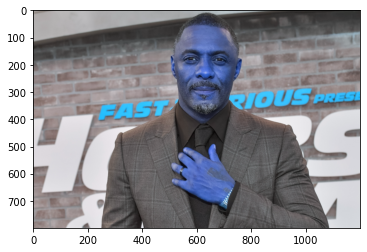

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(799, 1200)

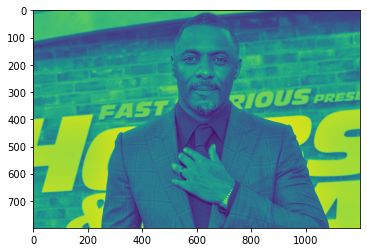

In [5]:
plt.imshow(gray)

In [6]:
gray

array([[171, 172, 170, ...,  47,  47,  48],
       [170, 170, 169, ...,  49,  48,  50],
       [169, 168, 167, ...,  49,  50,  50],
       ...,
       [145, 141, 139, ..., 221, 220, 220],
       [146, 141, 139, ..., 220, 220, 220],
       [142, 138, 139, ..., 219, 220, 220]], dtype=uint8)

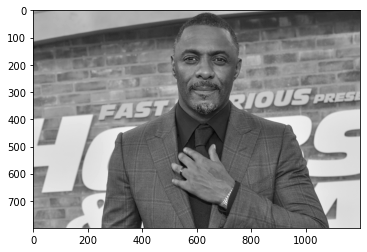

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[490,  66, 285, 285]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(490, 66, 285, 285)

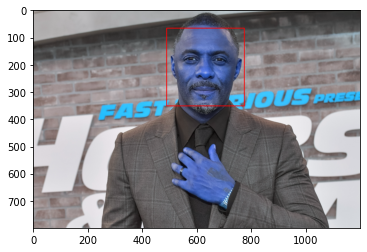

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

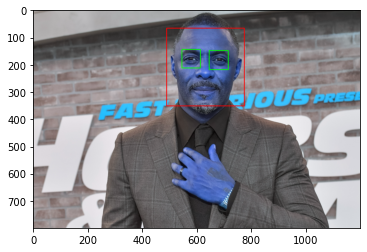

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

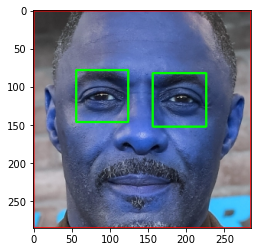

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

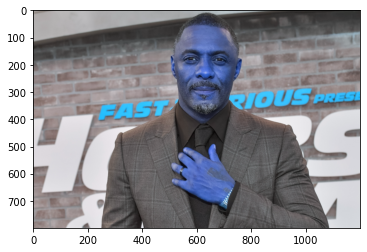

In [15]:
original_test_img = cv2.imread('./test_images/idris-elba-1.jpg')
plt.imshow(original_test_img)

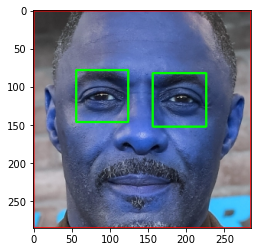

In [20]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/idris-elba-1.jpg')
plt.imshow(cropped_img)

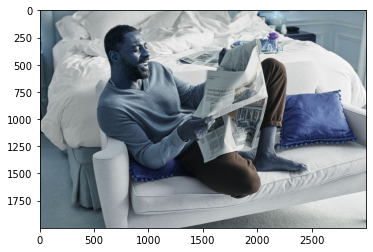

In [22]:
obstructed_img = cv2.imread('./test_images/1499269141-esq080117idris001.jpg')
plt.imshow(obstructed_img)

In [23]:
get_cropped_image_if_2_eyes('./test_images/1499269141-esq080117idris001.jpg')